# General statistics of reviewed articles

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
#Path definition
root = './all_selected/'
air_pollution_path = root + 'air_pollution.csv'
heat_island_path = root + 'UHI.csv'
flooding_path = root + 'flooding.csv'
landslides_path = root + 'landslides.csv'

#Reading files
air_pollution = pd.read_csv(air_pollution_path, index_col=0)
heat_island = pd.read_csv(heat_island_path, index_col=0)
flooding = pd.read_csv(flooding_path, index_col=0)
landslides = pd.read_csv(landslides_path, index_col=0)

## Cloud plots of articles' keywords

In [9]:
def dataframeFromObject(obj):
    # Converting the data to a list of tuples
    data_list = list(obj.items())

    # Creating the dataframe
    df = pd.DataFrame(data_list, columns=['key', 'count']).sort_values(by=['count'], ascending=[False])
    return df

In [10]:
def getKeywordCount(df):
    results = {}
    for index, row in df.iterrows():
        if row['Include'] == 'Yes':
            keywords = str(row['keywords']).split(';')
            for keyword in keywords:
                kw = keyword.lower()
                if kw in results:
                    results[kw] = results[kw] + 1
                else:
                    results[kw] = 1
    return results

In [11]:
def genWordCloud(data):

    # Generating the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keyword Frequency Word Cloud')
    plt.show()

### Air pollution keyword word cloud

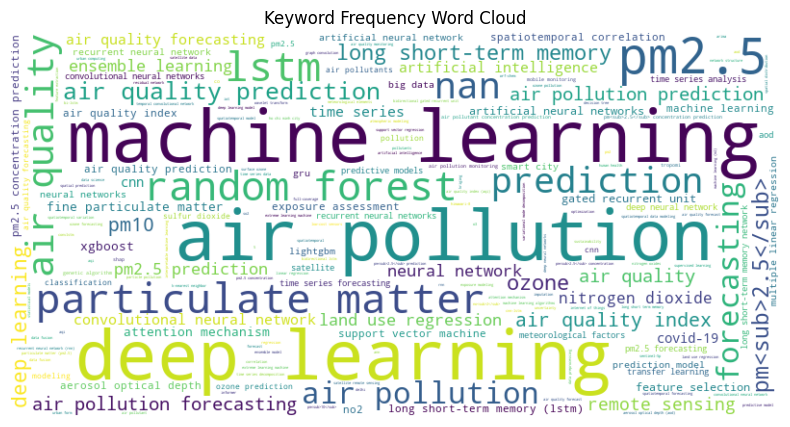

In [12]:
AP_keyword_obj = getKeywordCount(air_pollution)
AP_keyword_DF = dataframeFromObject(AP_keyword_obj)
genWordCloud(AP_keyword_obj)

### Urban heat island keyword word cloud

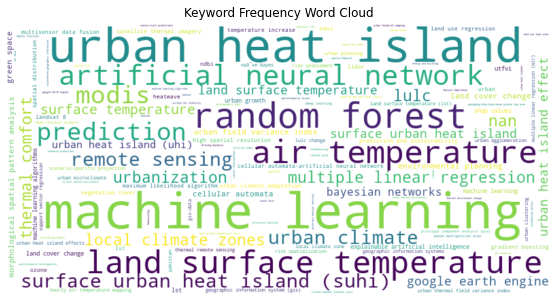

In [33]:
UHI_keyword_obj = getKeywordCount(heat_island)
UHI_keyword_DF = dataframeFromObject(UHI_keyword_obj)
genWordCloud(UHI_keyword_obj)

### Flood keyword word cloud

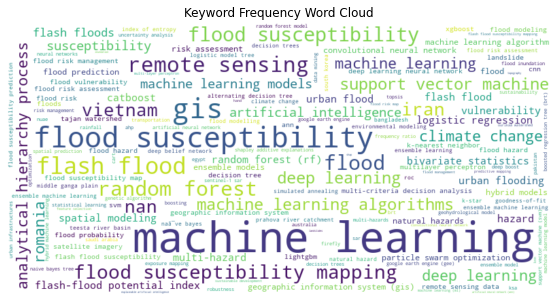

In [35]:
Flooding_keyword_obj = getKeywordCount(flooding)
Flooding_keyword_DF = dataframeFromObject(Flooding_keyword_obj)
genWordCloud(Flooding_keyword_obj)

### Landslide keyword word cloud

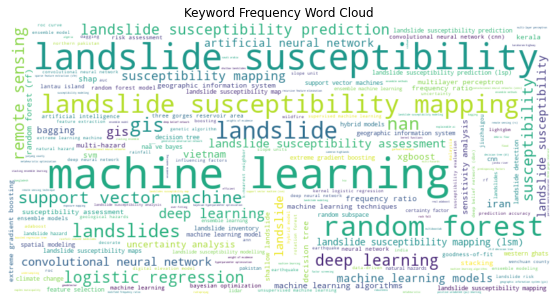

In [36]:
landslides_keyword_obj = getKeywordCount(landslides)
UHI_keyword_DF = dataframeFromObject(landslides_keyword_obj)
genWordCloud(landslides_keyword_obj)

## Count of articles per hazard and per year

In [3]:
AP_count = air_pollution.query('Include == "Yes"').groupby(['date']).count().reset_index()[['date','ID']]
UHI_count = heat_island.query('Include == "Yes"').groupby(['date']).count().reset_index()[['date','ID']]
F_count = flooding.query('Include == "Yes"').groupby(['date']).count().reset_index()[['date','ID']]
L_count = landslides.query('Include == "Yes"').groupby(['date']).count().reset_index()[['date','ID']]

In [4]:
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1000,
    'width': 1800,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [5]:
# Create traces
fig = go.Figure()
width = 5
size = 10
fig.add_trace(go.Scatter(x=AP_count.date, y=AP_count.ID,
                    mode='lines+markers',
                    name='Air Pollution',                    
                    line=dict(
                        width=width
                    ),
                    marker=dict(
                        size=size
                    )
                )
            )
fig.add_trace(go.Scatter(x=UHI_count.date, y=UHI_count.ID,
                    mode='lines+markers',
                    name='Urban Heat Island',
                    line=dict(
                        width=width
                    ),
                    marker=dict(
                        size=size
                    )
                )
            )
fig.add_trace(go.Scatter(x=F_count.date, y=F_count.ID,
                    mode='lines+markers',
                    name='Flooding',
                    line=dict(
                        width=width
                    ),
                    marker=dict(
                        size=size
                    )
                )
            )
fig.add_trace(go.Scatter(x=L_count.date, y=L_count.ID,
                    mode='lines+markers',
                    name='Landslides',
                    line=dict(
                        width=width
                    ),
                    marker=dict(
                        size=size
                    )
                )
            )

fig.update_layout(
    template='plotly_white',
    xaxis_title="Year",
    yaxis_title="No. of articles",
)
fig.update_xaxes(type='category')
fig.show(config=config)